# Figure 10

In [1]:
import pebbles
import gas_properties
from constants import AU_TO_CM, M_PLUTO, M_SUN, G, YRS_TO_SEC
import numpy as np
import matplotlib.pyplot as plt
from pebble_accretion import focus_accretion, bondi_accretion, hill_accretion
import reader

In [2]:
# Independant Variables
R = 10  * AU_TO_CM  # cm
Z = 0.01
n_pebbles = 250

# Dependant Variables
T = gas_properties.gas_temp(R)
H = gas_properties.scale_height(T, R)
c_S = gas_properties.sound_speed(T)
Omega = gas_properties.kep_frequency(R)
Sigma = gas_properties.column_density(R, m_disk = 0.05 * M_SUN)
delta_v = 3000
rho_g = Sigma / (np.sqrt(2 * np.pi) * H)
rho_d = rho_g * Z

In [3]:
bimodal = pebbles.Pebbles(n_pebbles=n_pebbles, a_min = 1e-4, a_max=1, rho_sil = 3.2, rho_ice = 1.0, model="bimodal", scale_height=H, gas_density=rho_g)
bimodal_f = bimodal.volume_density_distribution(rho_d, alpha=1e-4)
bimodal_W = bimodal.column_density_distribution(Z=Z, gas_column_density=Sigma)
bimodal_da = np.gradient(bimodal.radius)

p=0.49712000000033774, k=2.990000000000011, q=0.5071200000003269


In [4]:
n_mass = 75
masses = np.logspace(-5, np.log10(2.5), n_mass) * M_PLUTO

i_low_density = np.where(masses <= 1e-3 * M_PLUTO)[0]
i_high_density = np.where(2e-1 * M_PLUTO < masses)[0]
densities = np.zeros(n_mass)
densities[i_low_density] = 0.5
densities[i_high_density] = 2.0

mid_range_density = np.logspace(np.log10(0.5), np.log10(2.0), len(masses) - len(i_low_density) - len(i_high_density))
densities[max(i_low_density) + 1:min(i_high_density)] = mid_range_density

In [5]:
focus_bi = np.zeros([n_pebbles, n_mass])
bondi_bi = np.zeros([n_pebbles, n_mass])
hill_bi = np.zeros([n_pebbles, n_mass])
actual_bi = np.zeros([n_pebbles, n_mass])
ice_frac_bi = np.zeros(n_mass)

transition_mass = np.sqrt(1 / 3) * delta_v ** 3 / G / Omega * (1 / 8) / bimodal.St

for i in range(n_mass):
    for j in range(n_pebbles):
        focus_bi[j, i] = focus_accretion(mass=masses[i], density=densities[i], rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H, alpha=1e-4)
        bondi_bi[j, i] = bondi_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        hill_bi[j, i] = hill_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        if masses[i] < transition_mass[j]:
            actual_bi[j, i] = max(focus_bi[j, i], bondi_bi[j, i])
        else:
            actual_bi[j, i] = hill_bi[j, i]

for i in range(n_mass):
    for j in range(n_pebbles):
        ice_frac_bi[i] += actual_bi[j, i] / np.sum(actual_bi, axis=0)[i] * bimodal.ice_fraction[j]

In [6]:
# Independant Variables
R = 20  * AU_TO_CM  # cm
Z = 0.01
n_pebbles = 250

# Dependant Variables
T = gas_properties.gas_temp(R)
H = gas_properties.scale_height(T, R)
c_S = gas_properties.sound_speed(T)
Omega = gas_properties.kep_frequency(R)
Sigma = gas_properties.column_density(R, m_disk = 0.05 * M_SUN)
delta_v = 3000
rho_g = Sigma / (np.sqrt(2 * np.pi) * H)
rho_d = rho_g * Z

In [7]:
bimodal = pebbles.Pebbles(n_pebbles=n_pebbles, a_min = 1e-4, a_max=1, rho_sil = 3.2, rho_ice = 1.0, model="bimodal", scale_height=H, gas_density=rho_g)
bimodal_f = bimodal.volume_density_distribution(rho_d, alpha=1e-4)
bimodal_W = bimodal.column_density_distribution(Z=Z, gas_column_density=Sigma)
bimodal_da = np.gradient(bimodal.radius)

p=0.49712000000033774, k=2.990000000000011, q=0.5071200000003269


In [8]:
focus_bi1 = np.zeros([n_pebbles, n_mass])
bondi_bi1 = np.zeros([n_pebbles, n_mass])
hill_bi1 = np.zeros([n_pebbles, n_mass])
actual_bi1 = np.zeros([n_pebbles, n_mass])
ice_frac_bi1 = np.zeros(n_mass)

transition_mass = np.sqrt(1 / 3) * delta_v ** 3 / G / Omega * (1 / 8) / bimodal.St

for i in range(n_mass):
    for j in range(n_pebbles):
        focus_bi1[j, i] = focus_accretion(mass=masses[i], density=densities[i], rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H, alpha=1e-4)
        bondi_bi1[j, i] = bondi_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        hill_bi1[j, i] = hill_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        if masses[i] < transition_mass[j]:
            actual_bi1[j, i] = max(focus_bi1[j, i], bondi_bi1[j, i])
        else:
            actual_bi1[j, i] = hill_bi1[j, i]

for i in range(n_mass):
    for j in range(n_pebbles):
        ice_frac_bi1[i] += actual_bi1[j, i] / np.sum(actual_bi1, axis=0)[i] * bimodal.ice_fraction[j]

In [9]:
# Independant Variables
R = 30  * AU_TO_CM  # cm
Z = 0.01
n_pebbles = 250

# Dependant Variables
T = gas_properties.gas_temp(R)
H = gas_properties.scale_height(T, R)
c_S = gas_properties.sound_speed(T)
Omega = gas_properties.kep_frequency(R)
Sigma = gas_properties.column_density(R, m_disk = 0.05 * M_SUN)
delta_v = 3000
rho_g = Sigma / (np.sqrt(2 * np.pi) * H)
rho_d = rho_g * Z

In [10]:
bimodal = pebbles.Pebbles(n_pebbles=n_pebbles, a_min = 1e-4, a_max=1, rho_sil = 3.2, rho_ice = 1.0, model="bimodal", scale_height=H, gas_density=rho_g)
bimodal_f = bimodal.volume_density_distribution(rho_d, alpha=1e-4)
bimodal_W = bimodal.column_density_distribution(Z=Z, gas_column_density=Sigma)
bimodal_da = np.gradient(bimodal.radius)

p=0.49712000000033774, k=2.990000000000011, q=0.5071200000003269


In [11]:
focus_bi2 = np.zeros([n_pebbles, n_mass])
bondi_bi2 = np.zeros([n_pebbles, n_mass])
hill_bi2 = np.zeros([n_pebbles, n_mass])
actual_bi2 = np.zeros([n_pebbles, n_mass])
ice_frac_bi2 = np.zeros(n_mass)

transition_mass = np.sqrt(1 / 3) * delta_v ** 3 / G / Omega * (1 / 8) / bimodal.St

for i in range(n_mass):
    for j in range(n_pebbles):
        focus_bi2[j, i] = focus_accretion(mass=masses[i], density=densities[i], rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H, alpha=1e-4)
        bondi_bi2[j, i] = bondi_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        hill_bi2[j, i] = hill_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        if masses[i] < transition_mass[j]:
            actual_bi2[j, i] = max(focus_bi2[j, i], bondi_bi2[j, i])
        else:
            actual_bi2[j, i] = hill_bi2[j, i]

for i in range(n_mass):
    for j in range(n_pebbles):
        ice_frac_bi2[i] += actual_bi2[j, i] / np.sum(actual_bi2, axis=0)[i] * bimodal.ice_fraction[j]
        

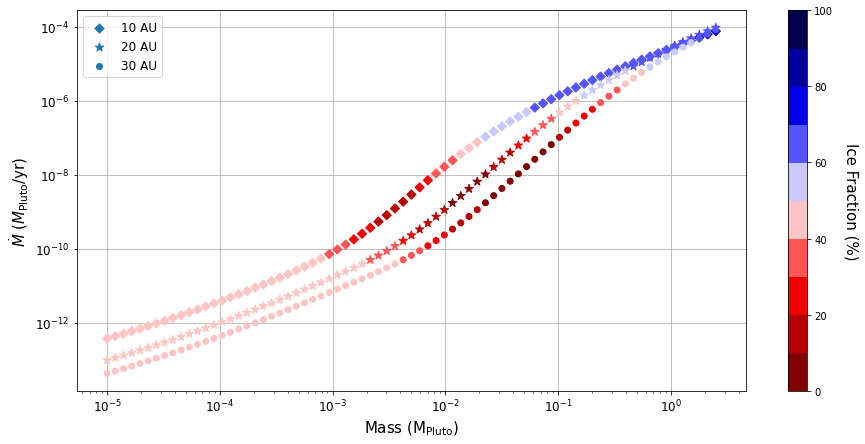

In [12]:
from matplotlib import colors

plt.figure(figsize=(15, 7))
cmap = plt.cm.seismic_r
norm = colors.BoundaryNorm(np.arange(0, 110, 10), cmap.N)
plt.scatter(masses / M_PLUTO, np.sum(actual_bi, axis=0) / M_PLUTO * YRS_TO_SEC, marker="D", s=6.5 ** 2, c=ice_frac_bi * 100, cmap=cmap, norm=norm, zorder=3, label="10 AU")
plt.scatter(masses / M_PLUTO, np.sum(actual_bi1, axis=0) / M_PLUTO * YRS_TO_SEC, marker="*", s=9 ** 2, c=ice_frac_bi1 * 100, cmap=cmap, norm=norm, zorder=3, label="20 AU")
plt.scatter(masses / M_PLUTO, np.sum(actual_bi2, axis=0) / M_PLUTO * YRS_TO_SEC, c=ice_frac_bi2 * 100, cmap=cmap, norm=norm, zorder=3, label="30 AU")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Mass (M$_{\rm{Pluto}}$)", fontsize=15)
plt.ylabel(r"$\dot{M} \ (M_{\rm{Pluto}}/\rm{yr})$", fontsize=15)
plt.legend(fontsize=12)
cb = plt.colorbar()
cb.set_label("Ice Fraction (%)", rotation=270, labelpad=25, fontsize=15)
plt.grid()
plt.tick_params(labelsize=12)
plt.savefig("acc_rates_v_r.pdf", dpi=350)